In [31]:
# problem: remove ab aggregates from single positive EVs
# target: 0 for ab aggregates, 1 for EV (classification)

In [32]:
import pandas as pd
%matplotlib inline 
import numpy as np
from scipy.stats import lognorm, norm
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

In [33]:
#AB fitting with curve_fit, bins need to be 200!
df=pd.read_table(r'~/Downloads/data file/EV sample total 2.csv')

#discard headers
df_new = df.loc[13:] # 14 for single file, 13 for 'total' file
df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df1 = df1[df1.columns].astype(float)

rslt_df_0 = df1[(df1['Channel 1 binned counts'] >= 3 )| (df1['Channel 2 binned counts'] >= 3)]  #channel 1 or 2 positive
radius = rslt_df_0[rslt_df_0['radius_of_gyration']<300]['radius_of_gyration']
print('interested particle numbers for ab aggregates')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())

interested particle numbers for ab aggregates
20809
median radius of interested particle numbers
41.17086


(array([2.110e+02, 1.301e+03, 2.168e+03, 2.603e+03, 2.280e+03, 1.919e+03,
        1.538e+03, 1.213e+03, 9.310e+02, 7.790e+02, 6.570e+02, 5.310e+02,
        5.100e+02, 4.900e+02, 4.170e+02, 3.580e+02, 3.620e+02, 3.200e+02,
        3.280e+02, 2.630e+02, 2.140e+02, 2.260e+02, 2.300e+02, 1.620e+02,
        1.350e+02, 1.420e+02, 8.600e+01, 9.700e+01, 8.100e+01, 5.400e+01,
        3.900e+01, 4.000e+01, 2.600e+01, 2.000e+01, 1.700e+01, 1.600e+01,
        1.500e+01, 1.200e+01, 7.000e+00, 3.000e+00, 2.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([  7.3404956 ,  13.02065049,  18.70080538,  24.38096026,
         30.06111515,  35.74127004,  41.42142493,  47.10157982,
         52.7817347 ,  58.46188959,  64.14204448,  69.82219937,
         75.50235426,  81.18250914,  86.86266403,  92.54281892,
         98.22297381, 103.9031287 , 109.58328358, 115.26343847,
        120.94359336, 126.62374825, 132.30390314, 137.98

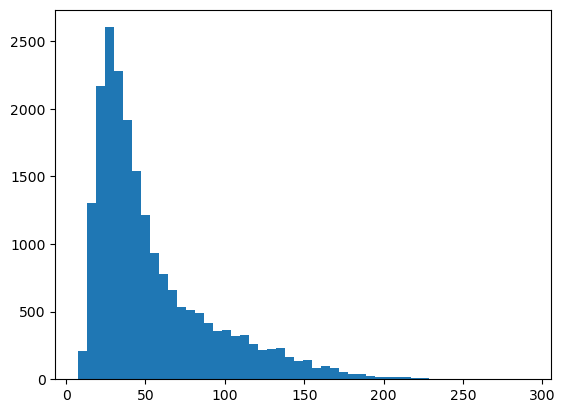

In [34]:
plt.hist(radius,bins=50)

In [35]:
rslt_df_0=rslt_df_0.reset_index(drop=True)
# rslt_df_0=rslt_df_0.drop('index', axis=1)
rslt_df_0['label'] = [0]*len(rslt_df_0)

In [36]:
#EV

df=pd.read_table(r'~/Desktop/codi data/troubleshooting/20230427 tim4 b1 c1/B1/20230427 tim4 B1 ONI total.csv')

df_new = df.loc[13:] # 14 for single file, 13 for 'total' file

df1=df_new[df_new.columns[0]].str.split(',', expand=True)
df1.columns = df1.iloc[0]
df1=df1.drop(df1.index[0])
df1=df1.reset_index(drop=True)
df2 = df1[df1.columns].astype(float)

rslt_df_1 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 1&2 positive
radius = rslt_df_1[rslt_df_1['radius_of_gyration']<300]['radius_of_gyration']
# radius = rslt_df['radius_of_gyration']
print(len(rslt_df_1))

8148


In [37]:
rslt_df_1=rslt_df_1.reset_index(drop=True)
# rslt_df_1=rslt_df_1.drop('index', axis=1)
rslt_df_1['label'] = [1]*len(rslt_df_1)

In [38]:
# split 1 double positive particle to 2 single positive particle and change the feature value
import random
import copy

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_1 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_1['Channel 2 binned counts'] = random_numbers
rslt_df_1_1['Channel 2 positive'] = 0

# rslt_df_1_1 = pd.DataFrame()
rslt_df_1_2 = copy.deepcopy(rslt_df_1)
random_numbers = np.random.randint(low=0, high=3, size=len(rslt_df_1_1))
rslt_df_1_2['Channel 1 binned counts'] = random_numbers
rslt_df_1_2['Channel 1 positive'] = 0

In [39]:
n_0 = int(len(rslt_df_0)*4/5)
n_1 = int(len(rslt_df_1)*4/5)

In [40]:
train_0 = rslt_df_0.iloc[:n_0,:]
# train_1 = rslt_df_1.iloc[:n_1,:]
train_2 = rslt_df_1_1.iloc[:n_1,:]
train_3 = rslt_df_1_2.iloc[:n_1,:]
train_total = pd.concat([train_0,train_2,train_3]).reset_index(drop=True)
# train = train_total.sample(frac=1, random_state=42).reset_index(drop=True)
train = train_total

In [41]:
# result = pd.concat([rslt_df_0, rslt_df_1])

In [42]:
# result = result.reset_index(drop=True)

In [43]:
test_0 = rslt_df_0.iloc[n_0:,:]
# test_1 = rslt_df_1.iloc[n_1:,:]
test_2 = rslt_df_1_1.iloc[n_1:,:]
test_3 = rslt_df_1_2.iloc[n_1:,:]
test_total = pd.concat([test_0,test_2,test_3]).reset_index(drop=True)
# test = test_total.sample(frac=1, random_state=42).reset_index(drop=True)
test = test_total

In [44]:
import matplotlib.pylab as plt
%matplotlib inline

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.base import TransformerMixin

class Transformer():

    def __init__(self):
        self.mean = 0
    
    def fit(self, X, y=None):
        '''
        Get mean
        Input: X datafrome
        '''
        

    def transform(self, X, y=None):
        '''
        Transform data and fill na with mean
        Input: X dataframe
        '''
        df = pd.DataFrame()
        
        df['num_localisations']=X['num_localisations']
        df['skew']=X['skew']
        df['circularity']=X['circularity']
        df['density']=X['density']
        df['convex_hull_area']=X['convex_hull_area']
        df['discretised_area']=X['discretised_area']
        df['radius_of_gyration']=X['radius_of_gyration']
        df['length']=X['length']
        df['distance_birth']=X['distance_birth']
        df['distance_death']=X['distance_death']
        df['Channel 1 binned counts'] = X['Channel 1 binned counts']
        df['Channel 2 binned counts'] = X['Channel 2 binned counts']
      
        return df

    
 
    def fit_transform(self, X, y=None):
        '''
        Combine fit and transform
        Input: X dataframe
        '''        
        self.fit(X)
        return self.transform(X)
          

In [46]:
# Transformer().fit_transform(X_train)

In [47]:
# df_copy.tail(20)
features = list(train.columns)
target = 'label'
features.remove(target)

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Create and train the SVM classifier
# model = SVC(kernel='linear')

pipeline = Pipeline(steps=[
    ('tf', Transformer()),
    ('scaler', MinMaxScaler()),       # Apply MinMaxScaler
    ('classifier', SVC(kernel='linear',class_weight='balanced',probability=True))
])

In [49]:
from sklearn.metrics import accuracy_score

# Fit the pipeline
pipeline.fit(X_train, y_train)

support_vectors = pipeline.steps[2][1].support_vectors_

y_train_pred = pipeline.predict(X_train)

accuracy = accuracy_score(y_train, y_train_pred)
print("train Accuracy:", accuracy)

# Make predictions on the test set
y_test_pred = pipeline.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_test_pred)
print("test Accuracy:", accuracy)


train Accuracy: 0.8469831216521241
test Accuracy: 0.8497709512260846


In [50]:
from sklearn.metrics import accuracy_score

# Compute accuracy score
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.8469831216521241
Test Accuracy: 0.8497709512260846


In [51]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_train, y_train_pred)

# Print classification report
print(report)

from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print classification report
print(report)

from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm1 = confusion_matrix(y_train, y_train_pred)
cm2 = confusion_matrix(y_test, y_test_pred)


# Print confusion matrix
print(cm1)
print(cm2)


              precision    recall  f1-score   support

           0       0.85      0.88      0.87     16647
           1       0.84      0.81      0.82     13036

    accuracy                           0.85     29683
   macro avg       0.85      0.84      0.84     29683
weighted avg       0.85      0.85      0.85     29683

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4162
           1       0.84      0.81      0.83      3260

    accuracy                           0.85      7422
   macro avg       0.85      0.85      0.85      7422
weighted avg       0.85      0.85      0.85      7422

[[14632  2015]
 [ 2527 10509]]
[[3660  502]
 [ 613 2647]]


In [52]:
#fit single positive channels with double positive EV distribution and AB distribution from corresponding channels
# cd9

rslt_df1 = df2[(df2['Channel 1 binned counts'] < 3 )& (df2['Channel 2 binned counts'] >= 3)]  #channel 2 positive
rslt_df2 = df2[(df2['Channel 1 binned counts'] >= 3 )& (df2['Channel 2 binned counts'] < 3)]  #channel 1 positive
rslt_df = pd.concat([rslt_df1,rslt_df2]).reset_index(drop=True)

radius = rslt_df['radius_of_gyration']
print('interested particle numbers for channel 2/CD9 single positive')
print(len(radius))
print('median radius of interested particle numbers')
print(radius.median())




interested particle numbers for channel 2/CD9 single positive
12734
median radius of interested particle numbers
36.304525


In [53]:
X_test_2 = rslt_df[features]

y_test_2 = pipeline.predict(X_test_2)

In [54]:
sum(y_test_2)/len(y_test_2)*100

30.084812313491437

In [55]:
# Print accuracy score
print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

Train Accuracy: 0.8469831216521241
Test Accuracy: 0.8497709512260846


AUC-ROC Score: 0.9076434318092705


Text(0, 0.5, 'true positive rate')

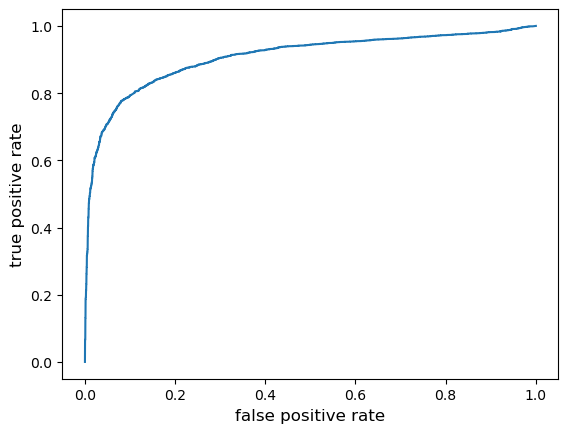

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

# Make predictions on the train & test set
# y_pred_prob_train = pipeline.predict_proba(X_train)[:, 1]
y_pred_prob_test = pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_prob_test)

print("AUC-ROC Score:", auc_roc_score)

# roc_auc_score(y_train, y_train_proba[:, 1])

# roc_auc_score(y_test, y_test_proba[:, 1])

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr,tpr)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

Text(0, 0.5, 'true positive rate')

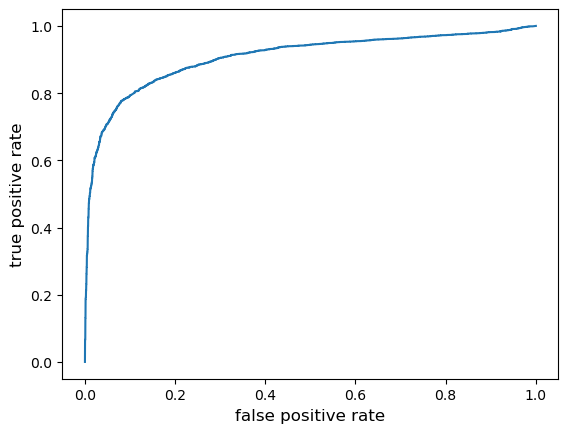

In [57]:
fpr_svm, tpr_svm, thresholds_svm_1 = metrics.roc_curve(y_test, y_pred_prob_test)

plt.plot(fpr_svm,tpr_svm)

plt.xlabel('false positive rate', fontsize=12)
plt.ylabel('true positive rate', fontsize=12)

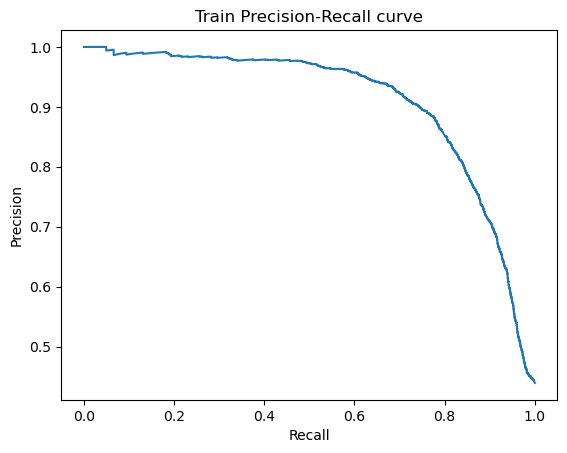

In [58]:
from sklearn.metrics import precision_recall_curve

precision_svm, recall_svm, thresholds_svm_2 = precision_recall_curve(y_test, y_pred_prob_test)
plt.plot(recall_svm, precision_svm)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve");

In [59]:
%store fpr_svm
%store tpr_svm
%store thresholds_svm_1
%store precision_svm
%store recall_svm
%store thresholds_svm_2

Stored 'fpr_svm' (ndarray)
Stored 'tpr_svm' (ndarray)
Stored 'thresholds_svm_1' (ndarray)
Stored 'precision_svm' (ndarray)
Stored 'recall_svm' (ndarray)
Stored 'thresholds_svm_2' (ndarray)
